<a href="https://colab.research.google.com/github/kevit-priya-lakhani/house-price-data-analysis/blob/main/data_analysis_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''

Dataset: House Prices
The dataset is available on Kaggle :https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

NumPy:
1. Create a NumPy array of "LotArea" and calculate its mean, median, and standard deviation.
2. Normalize the "SalePrice" column using Min-Max scaling.

pandas:
1. Load the dataset into a pandas DataFrame.
2. Display the summary statistics for the dataset.
3. Identify and handle missing values appropriately (e.g., impute with mean/median/mode or drop columns).
4. Encode categorical variables using one-hot encoding.
5. Create a new column "Age" as the difference between "YrSold" and "YearBuilt".
6. Group by "Neighborhood" and calculate the average sale price for each neighborhood.

Exploratory Data Analysis (EDA):
1. Plot the distribution of the "SalePrice" column.
2. Create a scatter plot showing the relationship between "GrLivArea" and "SalePrice".
3. Plot the correlation matrix and identify the top 5 features that are most correlated with "SalePrice".
4. Plot the average sale price by "OverallQual".
5. Create box plots for "SalePrice" grouped by "BldgType".


'''

'\n\nDataset: House Prices\nThe dataset is available on Kaggle :https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data\n\nNumPy:\n1. Create a NumPy array of "LotArea" and calculate its mean, median, and standard deviation.\n2. Normalize the "SalePrice" column using Min-Max scaling.\n\npandas:\n1. Load the dataset into a pandas DataFrame.\n2. Display the summary statistics for the dataset.\n3. Identify and handle missing values appropriately (e.g., impute with mean/median/mode or drop columns).\n4. Encode categorical variables using one-hot encoding.\n5. Create a new column "Age" as the difference between "YrSold" and "YearBuilt".\n6. Group by "Neighborhood" and calculate the average sale price for each neighborhood.\n\nExploratory Data Analysis (EDA):\n1. Plot the distribution of the "SalePrice" column.\n2. Create a scatter plot showing the relationship between "GrLivArea" and "SalePrice".\n3. Plot the correlation matrix and identify the top 5 features that are most 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### NumPy


In [ ]:
LotArea=np.array(data.LotArea)
print(f''' Lot Area stats
          mean: {LotArea.mean():.2f}
          median: {np.median(LotArea):.2f}
          standard deviation: {np.std(LotArea):.2f}''')

 Lot Area stats
          mean: 10516.83
          median: 9478.50
          standard deviation: 9977.85


In [ ]:
#Normalize the "SalePrice" column using Min-Max scaling.


sale_price=np.array(data.SalePrice)
sale_price=(sale_price-sale_price.min())/(sale_price.max()-sale_price.min())
data.SalePrice=pd.Series(sale_price)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0.241078
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0.203583
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,0.261908
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0.145952
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,0.298709


###Pandas

In [ ]:
#1. Load the dataset into a pandas DataFrame.
data=pd.read_csv('/content/train.csv')

In [ ]:
'''

2. Display the summary statistics for the dataset.
3. Identify and handle missing values appropriately (e.g., impute with mean/median/mode or drop columns).
4. Encode categorical variables using one-hot encoding.
5. Create a new column "Age" as the difference between "YrSold" and "YearBuilt".
6. Group by "Neighborhood" and calculate the average sale price for each neighborhood.

'''

'\n\n2. Display the summary statistics for the dataset.\n3. Identify and handle missing values appropriately (e.g., impute with mean/median/mode or drop columns).\n4. Encode categorical variables using one-hot encoding.\n5. Create a new column "Age" as the difference between "YrSold" and "YearBuilt".\n6. Group by "Neighborhood" and calculate the average sale price for each neighborhood.\n\n'

In [ ]:
#summary stats
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#handle missing values
print(data.isnull().sum().sort_values(ascending=False)[:22])


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
dtype: int64


In [ ]:
data.drop(labels=['PoolQC',"MiscFeature",'Alley','Fence'],axis=1,inplace=True)

In [ ]:
data.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
data.MasVnrType.fillna(value='None',inplace=True)
data.FireplaceQu.fillna(value='None',inplace=True)

In [ ]:
data.LotFrontage.fillna(data['LotFrontage'].mean(),inplace=True)

In [ ]:
data.drop(labels=['GarageYrBlt', 'GarageCond','GarageType' ,'GarageFinish','GarageQual' ,'BsmtFinType2','BsmtExposure','BsmtQual'   ,'BsmtCond'   ,'BsmtFinType1'],axis=1,inplace=True)

In [ ]:
#Encode categorical variables using one-hot encoding.


data_encoded = pd.get_dummies(data, columns=['Condition1','Condition2','HouseStyle'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
#Create a new column "Age" as the difference between "YrSold" and "YearBuilt".

data['Age']=data['YrSold']-data['YearBuilt']
data.iloc[:5,60:]

,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,0,0,2,2008,WD,Normal,208500,5
1,0,0,5,2007,WD,Normal,181500,31
2,0,0,9,2008,WD,Normal,223500,7
3,0,0,2,2006,WD,Abnorml,140000,91
4,0,0,12,2008,WD,Normal,250000,8


In [ ]:
#Group by "Neighborhood" and calculate the average sale price for each neighborhood.

data_by_neib=data.groupby('Neighborhood')['SalePrice'].mean().round(2)
data_by_neib

Neighborhood
Blmngtn    194870.88
Blueste    137500.00
BrDale     104493.75
BrkSide    124834.05
ClearCr    212565.43
CollgCr    197965.77
Crawfor    210624.73
Edwards    128219.70
Gilbert    192854.51
IDOTRR     100123.78
MeadowV     98576.47
Mitchel    156270.12
NAmes      145847.08
NPkVill    142694.44
NWAmes     189050.07
NoRidge    335295.32
NridgHt    316270.62
OldTown    128225.30
SWISU      142591.36
Sawyer     136793.14
SawyerW    186555.80
Somerst    225379.84
StoneBr    310499.00
Timber     242247.45
Veenker    238772.73
Name: SalePrice, dtype: float64

###EDA

In [ ]:
'''

Exploratory Data Analysis (EDA):
1. Plot the distribution of the "SalePrice" column.
2. Create a scatter plot showing the relationship between "GrLivArea" and "SalePrice".
3. Plot the correlation matrix and identify the top 5 features that are most correlated with "SalePrice".
4. Plot the average sale price by "OverallQual".
5. Create box plots for "SalePrice" grouped by "BldgType".

'''

<ipython-input-112-876edc726f2e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['SalePrice'],bins=20,palette='PuBuGn')


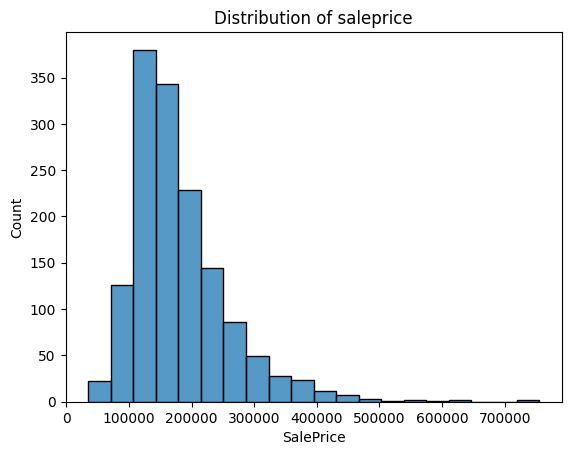

In [ ]:
# distribution of the "SalePrice" column.

sns.histplot(data['SalePrice'],bins=20,)
plt.title('Distribution of saleprice')
plt.show()

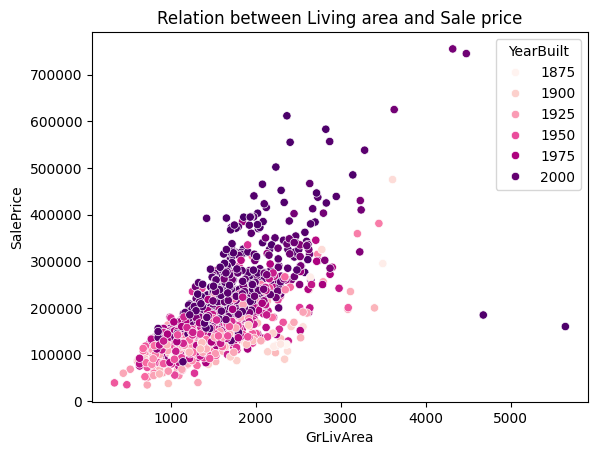

In [ ]:
# Create a scatter plot showing the relationship between "GrLivArea" and "SalePrice".

sns.scatterplot(x='GrLivArea',y='SalePrice',data=data,hue='YearBuilt',palette='RdPu')
plt.title('Relation between Living area and Sale price')
plt.show()

Text(0.5, 1.0, 'Average price based on Overall Quality')

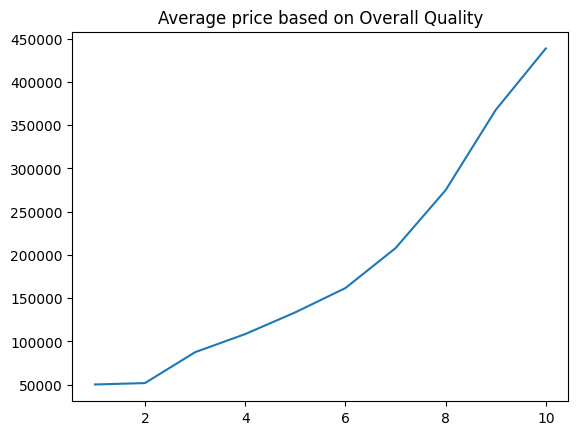

In [ ]:
#Plot the average sale price by "OverallQual".

av_price_by_qual=data.groupby('OverallQual')['SalePrice'].mean()

plt.plot(av_price_by_qual.index,av_price_by_qual)
plt.title("Average price based on Overall Quality")



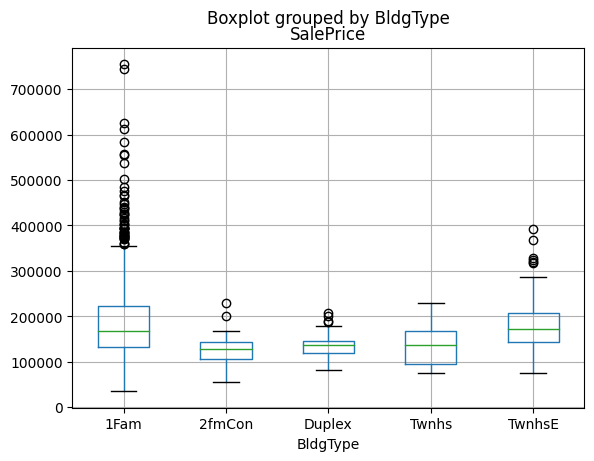

In [ ]:

data.boxplot(by='BldgType',column='SalePrice')
plt.show()

<Axes: >

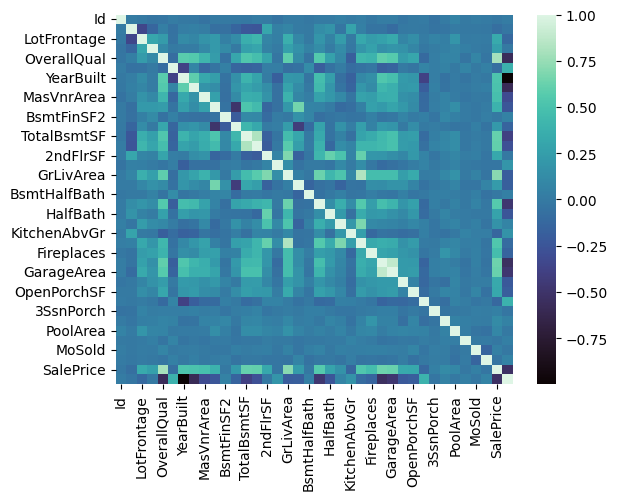

In [ ]:
df=data.select_dtypes(include=np.number)


df=df.corr()
sns.heatmap(data=df,cmap='mako')